## Classification problem using Drug dataset

dataset can found here: https://www.kaggle.com/prathamtripathi/drug-classification

## Step 1: Load packages, dataset and check the data we working with.

* Is there anything wrong with the data?
* Are there any anormalities with the data?
* Do I need to fix or remove any of the data including null values?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
df = pd.read_csv('/Users/mzwakhebesho/Documents/DPY401T Assignment/Classification Problem/drug_classification.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


The data is usable.

We can gather the following:

* The first row in the data file defines the column headers
* The headers are understandable enough to what each column represents.
* Each row represents an entry for an individual: 5 input data points and one target, which tells us the type of drug taken by an individual.

## Let us explore the dataset and get meaningful insights

In [5]:
# Now let's check complete information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# check the structure of the data
df.shape

(200, 6)

We have 200 rows and 6 columns

Info cell shows data types of each column. We have categorical data in column: Sex, BP, Cholesterol and Drug.

For now we going to check for null values

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Highest age in our dataset is 74 and lowest Sodium to Potessium ratio in the blood is 6.269000

<AxesSubplot:xlabel='Age', ylabel='Drug'>

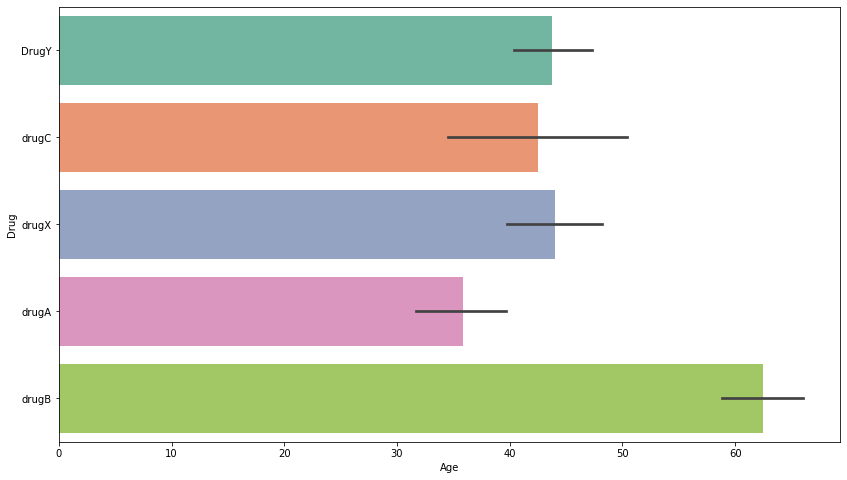

In [13]:
plt.figure(figsize=(14,8))
sn.barplot(x='Age', y='Drug', data=df, palette='Set2')

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

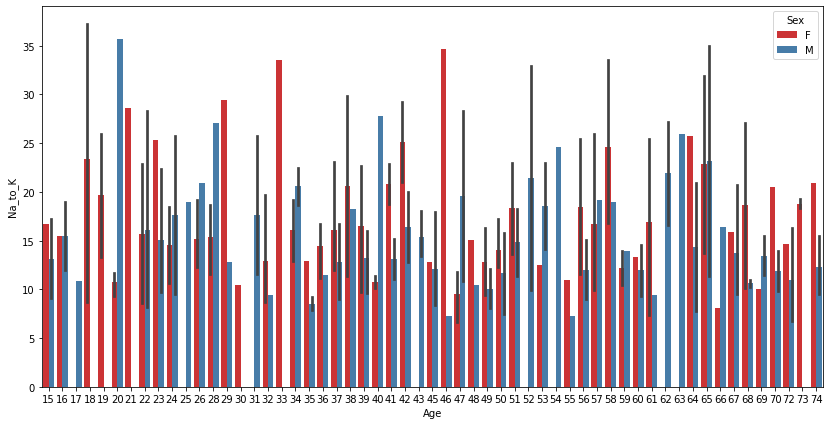

In [17]:
plt.figure(figsize=(14,7))
sn.barplot(x='Age', y='Na_to_K',hue='Sex',data=df, palette='Set1')

Comparing age to sodium-to-potessium ratio as Na_to_k plays a key role in hypertension

Let us determine which drug is used the most

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


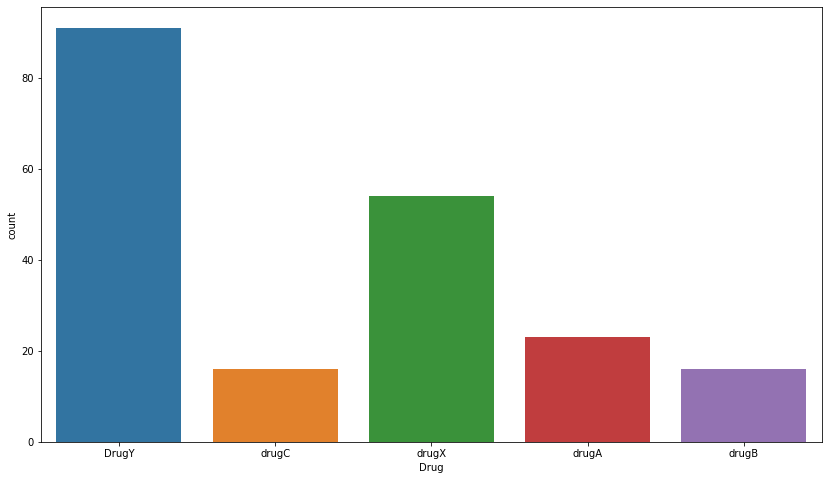

In [18]:
plt.figure(figsize=(14,8))
sn.countplot('Drug', data=df)
plt.show()

Drug Y is the most given out to patients.
Now let us determine the age group gets which drug

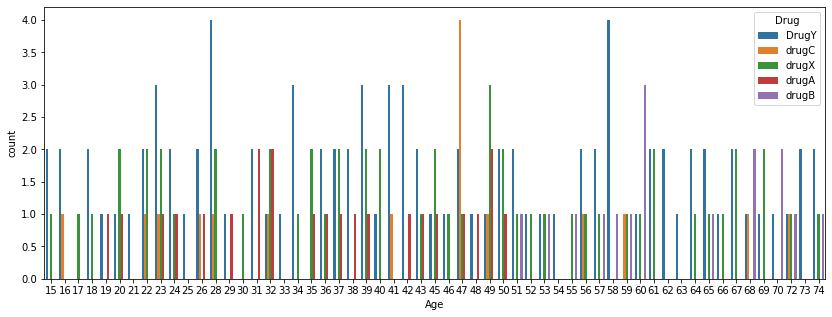

In [22]:
plt.figure(figsize=(14,5))
sn.countplot(x='Age', hue='Drug', data=df)
plt.show()

Now let us determine which gender gets which drug

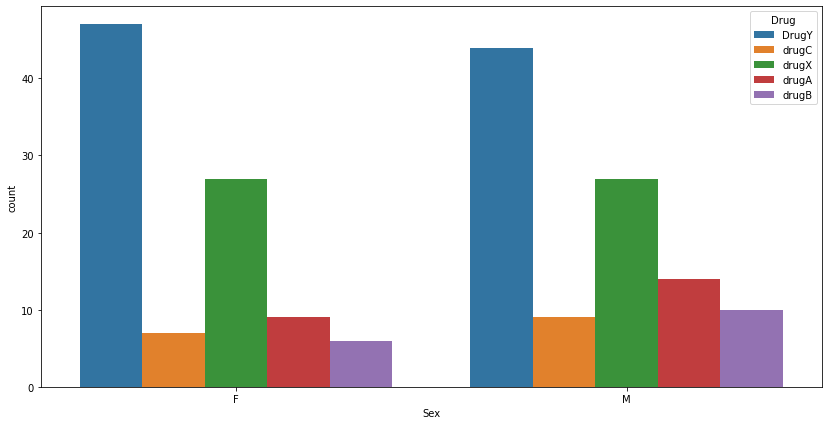

In [23]:
plt.figure(figsize=(14,7))
sn.countplot(x='Sex', hue='Drug', data=df)
plt.show()

Mostly females use drug Y

How BP, Cholesterol and Na_to_K influence which drug is prescribed

<AxesSubplot:xlabel='Na_to_K', ylabel='Drug'>

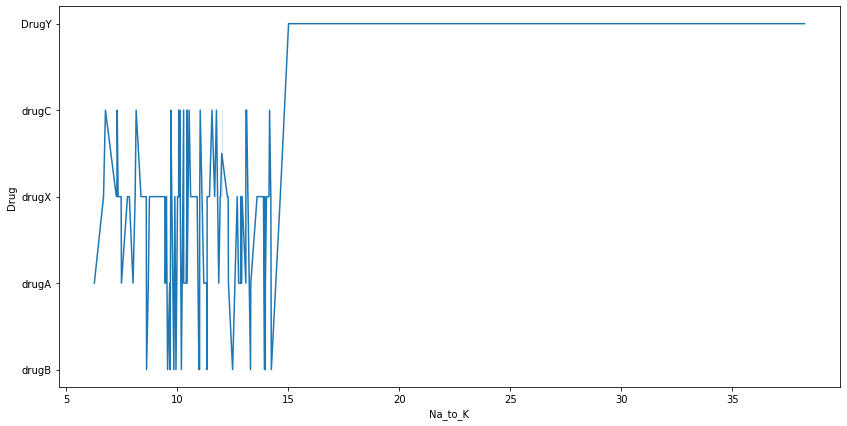

In [25]:
plt.figure(figsize=(14,7))
sn.lineplot(x='Na_to_K', y='Drug', data=df, palette='Set3')

<AxesSubplot:xlabel='Cholesterol', ylabel='Drug'>

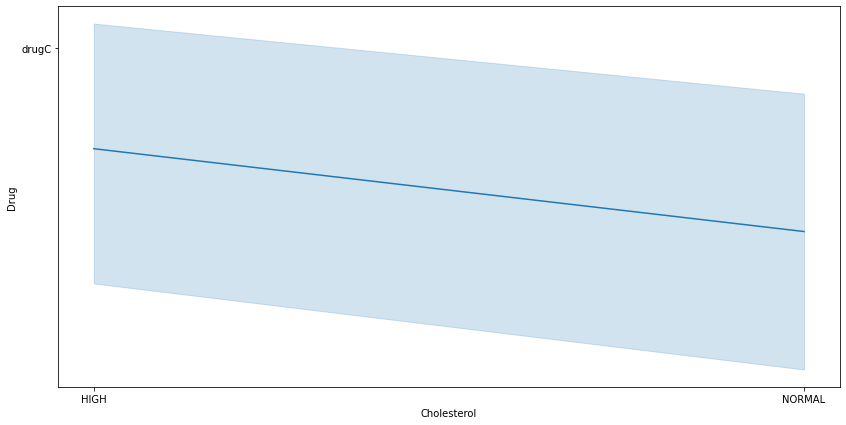

In [27]:
plt.figure(figsize=(14,7))
sn.lineplot(x='Cholesterol', y='Drug', data=df, palette='Set2')

<AxesSubplot:xlabel='BP', ylabel='Drug'>

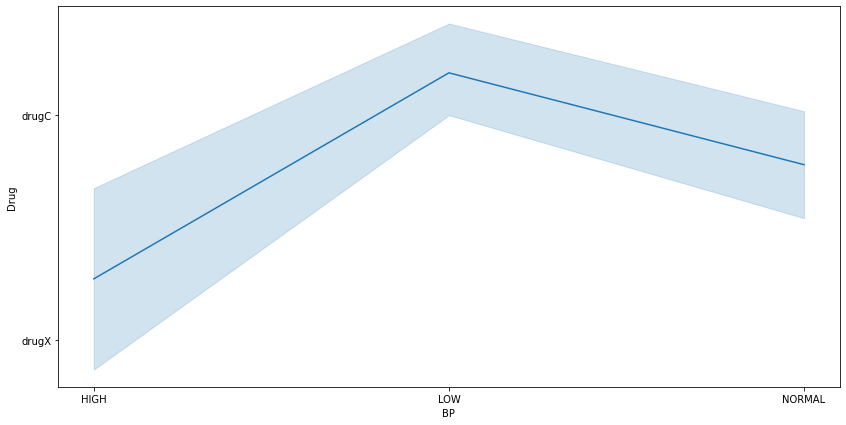

In [28]:
plt.figure(figsize=(14,7))
sn.lineplot(x='BP', y='Drug', data=df, palette='Set1')

Na_to_K ratio that is greater than 15 causes drug Y to be described

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<Figure size 1008x648 with 0 Axes>

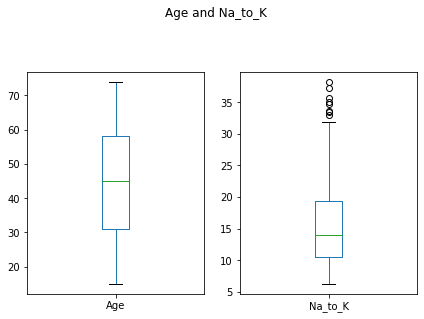

In [30]:
plt.figure(figsize=(14,9))
df[['Age','Na_to_K']].plot(kind='box', subplots=True, layout=(2,2),figsize=(7,9),title='Age and Na_to_K')
plt.show()

Outliers in Na_to_K

Categorical data, we can use OneHot Encoding. Prefer not to complicate it.
* Sex: Female - 0, Male - 1
* Drug: A - 0, B - 1, C - 2, X - 3, Y - 4
* BP: LOW - 0, NORMAL - 1, HIGH - 2
* Cholesterol: NORMAL - 0, HIGH - 1

In [37]:
# instead of using dictionary like I did on the other notebook. We can use list of columns that we want to change and use Label Encoder and loop through them
from sklearn.preprocessing import LabelEncoder

def labelEncoder(cols):
    label_encoder = LabelEncoder()
    df[cols] = label_encoder.fit_transform(df[cols])

columns = ["Sex","BP","Cholesterol","Drug"]

for col in columns:
    labelEncoder(cols=col)

In [38]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [39]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

## Step 2: Splitting Dataset into training and test


In [103]:
# First we need to take out features and targets in our dataset
feature_columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X_features = df.drop(['Drug'], axis=1) #axis = 1 means we taking the whole column and drop it. axis = 0 means whole row
Y_targets = df[['Drug']]

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features,Y_targets,test_size=0.33, random_state=42)

In [105]:
X_train.shape

(134, 5)

In [106]:
X_test.shape

(66, 5)

Let us scale the data. 
Used the explaination from this link: https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [47]:
#from sklearn.preprocessing import MinMaxScaler

#data_scaler = MinMaxScaler()

In [48]:
#X_train = data_scaler.fit_transform(X_train)
#X_test = data_scaler.transform(X_test)

## Prediction time
## Applying Support Vector Machine as first model

In [107]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

/Users/mzwakhebesho/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [108]:
svm_y_train_pred = svm_model.predict(X_train)

In [109]:
# Model predictions using test data
svm_y_test_pred = svm_model.predict(X_test)

In [63]:
y_test.head()

,Drug
95,4
15,0
30,4
158,3
128,0


In [110]:
test_results = X_test.copy()
test_results['true_drug'] = y_test
test_results['svm_predicted_drug'] = svm_y_test_pred

test_results.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,true_drug,svm_predicted_drug
95,36,1,1,1,11.424,4,4
15,16,0,0,1,15.516,0,0
30,18,0,2,1,8.750,4,4
158,59,0,1,0,10.444,3,4
128,47,1,1,1,33.542,0,0


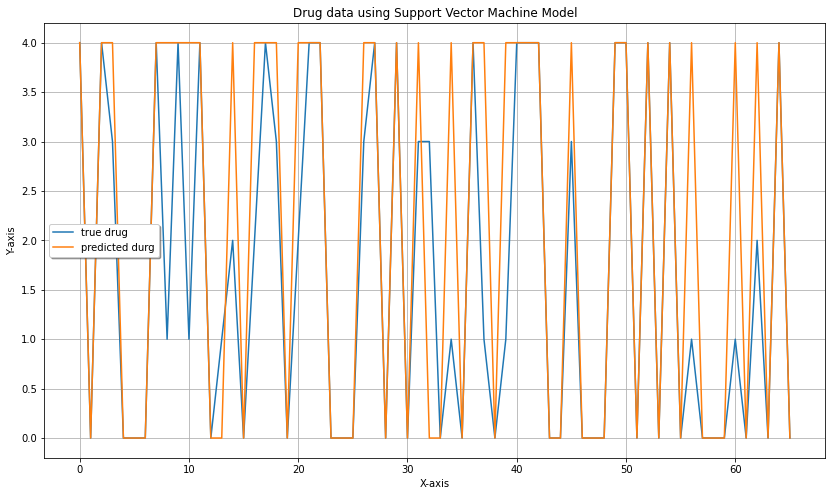

In [111]:
x_axis = range(len(svm_y_test_pred))
plt.figure(figsize=(14,8))
plt.plot(x_axis, y_test, label="true drug")
plt.plot(x_axis, svm_y_test_pred, label="predicted durg")
plt.title("Drug data using Support Vector Machine Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [112]:
svm_model_score_train = svm_model.score(X_train,y_train)
svm_model_score_test = svm_model.score(X_test,y_test)

print(f"Train score:{svm_model_score_train} Test score:{svm_model_score_test}")

Train score:0.7014925373134329 Test score:0.7272727272727273


In [123]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, svm_y_test_pred)
r2

0.5268456375838926

In [114]:
#Generating classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_y_test_pred,target_names=['Drug A','Drug B','Drug C','Drug X','Drug Y']))

              precision    recall  f1-score   support

      Drug A       0.94      1.00      0.97        29
      Drug B       0.00      0.00      0.00         8
      Drug C       0.00      0.00      0.00         4
      Drug X       0.00      0.00      0.00         6
      Drug Y       0.54      1.00      0.70        19

    accuracy                           0.73        66
   macro avg       0.30      0.40      0.33        66
weighted avg       0.57      0.73      0.63        66



/Users/mzwakhebesho/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mzwakhebesho/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mzwakhebesho/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Applying K-Nearest Neighbor as the second model

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

/Users/mzwakhebesho/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [116]:
knn_y_train_pred = knn_model.predict(X_train)

In [117]:
knn_y_test_pred = knn_model.predict(X_test)

In [119]:
test_results = X_test.copy()
test_results['true_drug'] = y_test
test_results['knn_predicted_drug'] = knn_y_test_pred

test_results.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,true_drug,knn_predicted_drug
95,36,1,1,1,11.424,4,4
15,16,0,0,1,15.516,0,0
30,18,0,2,1,8.750,4,3
158,59,0,1,0,10.444,3,2
128,47,1,1,1,33.542,0,0


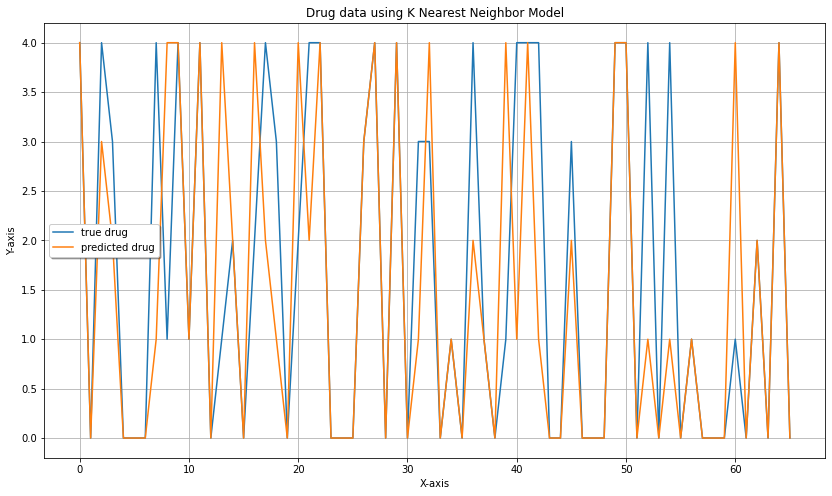

In [120]:
x_axis = range(len(knn_y_test_pred))
plt.figure(figsize=(14,8))
plt.plot(x_axis, y_test, label="true drug")
plt.plot(x_axis, knn_y_test_pred, label="predicted drug")
plt.title("Drug data using K Nearest Neighbor Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [121]:
knn_model_score_train = knn_model.score(X_train,y_train)
knn_model_score_test = knn_model.score(X_test,y_test)

print(f"Train score:{knn_model_score_train} Test score:{knn_model_score_test}")

Train score:0.7985074626865671 Test score:0.696969696969697


In [124]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, knn_y_test_pred)
r2

0.431208053691275

In [125]:
#Generating classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_y_test_pred,target_names=['Drug A','Drug B','Drug C','Drug X','Drug Y']))

              precision    recall  f1-score   support

      Drug A       1.00      1.00      1.00        29
      Drug B       0.36      0.50      0.42         8
      Drug C       0.29      0.50      0.36         4
      Drug X       0.50      0.17      0.25         6
      Drug Y       0.59      0.53      0.56        19

    accuracy                           0.70        66
   macro avg       0.55      0.54      0.52        66
weighted avg       0.72      0.70      0.70        66



## Applying Decision Tree Classifier as the third model

In [126]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [127]:
dtc_y_train_pred = dtc_model.predict(X_train)

In [128]:
dtc_y_test_pred = dtc_model.predict(X_test)

In [129]:
test_results = X_test.copy()
test_results['true_drug'] = y_test
test_results['dtc_predicted_drug'] = dtc_y_test_pred

test_results.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,true_drug,dtc_predicted_drug
95,36,1,1,1,11.424,4,4
15,16,0,0,1,15.516,0,0
30,18,0,2,1,8.750,4,4
158,59,0,1,0,10.444,3,3
128,47,1,1,1,33.542,0,0


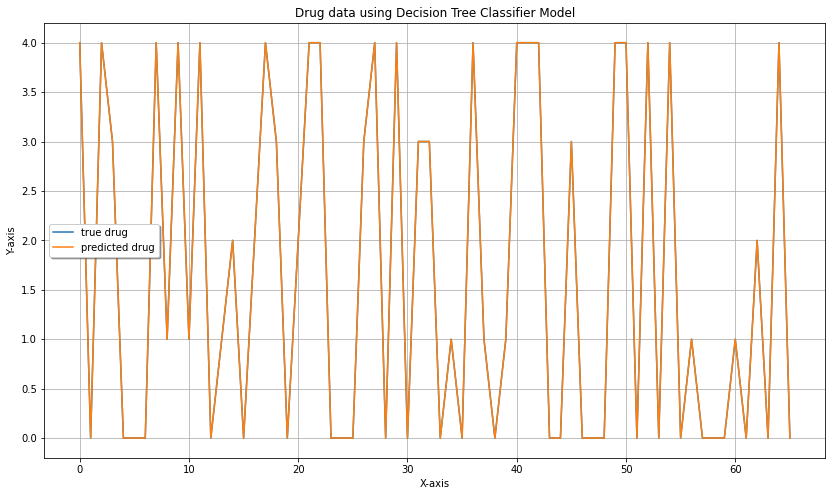

In [130]:
x_axis = range(len(dtc_y_test_pred))
plt.figure(figsize=(14,8))
plt.plot(x_axis, y_test, label="true drug")
plt.plot(x_axis, dtc_y_test_pred, label="predicted drug")
plt.title("Drug data using Decision Tree Classifier Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [131]:
dtc_model_score_train = dtc_model.score(X_train,y_train)
dtc_model_score_test = dtc_model.score(X_test,y_test)

print(f"Train score:{dtc_model_score_train} Test score:{dtc_model_score_test}")

Train score:1.0 Test score:1.0


In [132]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, dtc_y_test_pred)
r2

1.0

In [133]:
#Generating classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, dtc_y_test_pred,target_names=['Drug A','Drug B','Drug C','Drug X','Drug Y']))

              precision    recall  f1-score   support

      Drug A       1.00      1.00      1.00        29
      Drug B       1.00      1.00      1.00         8
      Drug C       1.00      1.00      1.00         4
      Drug X       1.00      1.00      1.00         6
      Drug Y       1.00      1.00      1.00        19

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



## Showing predicated values for different models in 1 table

In [139]:
final_results = X_test.copy()
final_results['true_drug'] = y_test
final_results['svm_predicted_drug'] = svm_y_test_pred
final_results['knn_predicted_drug'] = knn_y_test_pred
final_results['dtc_predicted_drug'] = dtc_y_test_pred

final_results.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,true_drug,svm_predicted_drug,knn_predicted_drug,dtc_predicted_drug
95,36,1,1,1,11.424,4,4,4,4
15,16,0,0,1,15.516,0,0,0,0
30,18,0,2,1,8.750,4,4,3,4
158,59,0,1,0,10.444,3,4,2,3
128,47,1,1,1,33.542,0,0,0,0
115,51,1,0,0,18.295,0,0,0,0
69,18,0,0,1,24.276,0,0,0,0
170,28,0,2,0,12.879,4,4,1,4
174,42,1,0,1,12.766,1,4,4,1
45,66,0,2,1,8.107,4,4,4,4


## Determining the best model

In [140]:
models = [('Support Vector Machine', '{0:.3f}'.format(svm_model_score_train), '{0:.3f}'.format(svm_model_score_test)),
          ('K Nearest Neighbor', '{0:.3f}'.format(knn_model_score_train), '{0:.3f}'.format(knn_model_score_test)),
          ('Decision Tree Classifier', '{0:.3f}'.format(dtc_model_score_train), '{0:.3f}'.format(dtc_model_score_test))]

model_results = pd.DataFrame(data = models, columns=['Model', 'Training R2_Score', 'Test R2_Score'])
model_results

,Model,Training R2_Score,Test R2_Score
0,Support Vector Machine,0.701,0.727
1,K Nearest Neighbor,0.799,0.697
2,Decision Tree Classifier,1.000,1.000
